In [60]:
%matplotlib inline 
import pandas as pd 
import numpy as np
from math import sqrt
import pylab as pl
from itertools import product

# Visualization Modules
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
# plot_tree(dt_reg) # For Large Datasets Tree Graph needs more visualization techniques

#Scipy Maths Models
import statsmodels.api as sm
from scipy import stats

# Machine Learning Training Modules
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor

# Clustering
from sklearn.cluster import KMeans

#Svm
from sklearn.svm import SVC


# Model Evaluation Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# Model Selection and Validation Methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, ShuffleSplit

# Preprocessing Modules 
from sklearn.preprocessing import PolynomialFeatures

In [52]:
data_file = 'Breast_Cancer_Dataset.csv' # make sure the path of the file is correct
df = pd.read_csv(data_file)


In [53]:
insignificant = ['id','perimeter_mean','radius_mean','compactness_mean',
              'concave points_mean','radius_se','perimeter_se',
              'radius_worst','perimeter_worst','compactness_worst',
              'concave points_worst','compactness_se','concave points_se',
              'texture_worst','area_worst', 'Unnamed: 32']

df.drop(insignificant, axis=1, inplace=True)
features = df.drop(['diagnosis'], axis=1)
label = df['diagnosis']

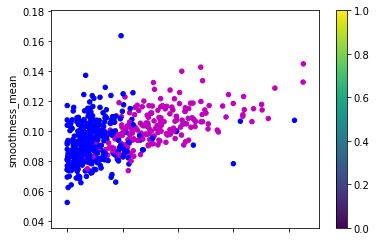

In [57]:
x_graph = 'concavity_mean'; y_graph = 'smoothness_mean'
df.plot.scatter(x=x_graph, y=y_graph, c=df.diagnosis.values, colormap='viridis')

In [56]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.20, shuffle=True) 


svm = SVC()
svm.fit(X_train, y_train)
score = svm.score(X_test, y_test)

print("Model Score :", score)

Model Score : 0.6052631578947368


/home/nandagopal/PycharmProjects/data-science-class/venv/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<class 'numpy.ndarray'> (6, 8)
<class 'numpy.ndarray'> (6, 8)


/home/nandagopal/PycharmProjects/data-science-class/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: 'continuous'

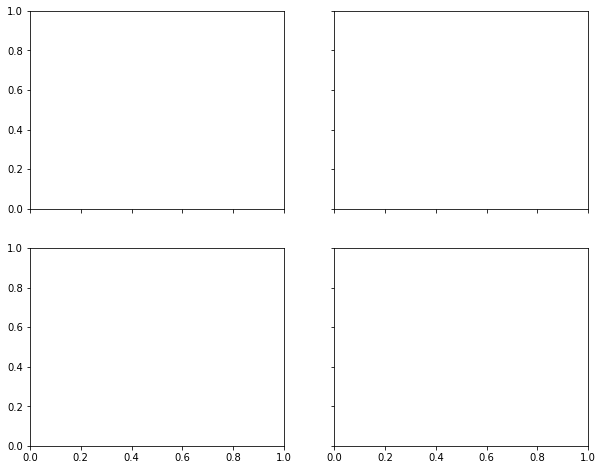

In [67]:
h=0.2
penalty = 'l2'
x_min, x_max = df[x_graph].values.min()- .5, df[x_graph].values.max() + .5
y_min, y_max = df[y_graph].values.min() - .5, df[y_graph].values.max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

print(type(xx), xx.shape)
print(type(yy), yy.shape)


C_Values = [50, 10, 1, 0.01]
pos = product([0, 1], [0, 1])
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for c, position in zip(C_Values, pos):
    lr_clf = SVC(C=c)
    lr_clf.fit(df.concavity_mean.values.reshape(-1,1), df.smoothness_mean.values.reshape(-1,1))
    Z = lr_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    i, j  = position
    axarr[i, j].contour(xx, yy, Z)
    axarr[i, j].scatter(df.x_graph, df.y_graph, c=df.diagnosis.values)
    axarr[i, j].set_title("C Value : {}, Penalty : {} , Co_eff : {}".format(c, penalty, lr_clf.coef_))